In [15]:
pip install numpy pandas scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [17]:
data = {
    "Shrinkage_Actual": [2.08, 2.08, 3.42, 3.42, 4.08, 2.75, 4.35, 3.42, 3.95, 2.08, 
                         1.95, 3.95, 2.15, 3.95, 3.42, 2.75, 2.95, 3.42, 3.28, 2.75], 
    "Fe_Loading": [92, 94, 92, 94, 92, 94, 92, 94, 91, 95, 
                   93, 93, 93, 93, 93, 93, 93, 93, 93, 93], 
    "Layer_Thickness": [0.15, 0.15, 0.25, 0.25, 0.15, 0.15, 0.25, 0.25, 0.20, 0.20, 
                        0.10, 0.30, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20], 
    "Infill_Density": [60, 60, 60, 60, 80, 80, 80, 80, 70, 70, 
                       70, 70, 50, 90, 70, 70, 70, 70, 70, 70]
}

df = pd.DataFrame(data)


In [18]:
X = df[['Fe_Loading', 'Layer_Thickness', 'Infill_Density']]
y = df['Shrinkage_Actual']


In [19]:
degree = 2  # Change this if you want to test other degrees
poly_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))
poly_model.fit(X, y)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge())])

In [20]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


NameError: name 'y_pred' is not defined

MAE: 0.2349
MSE: 0.0742
R² Score: 0.8647


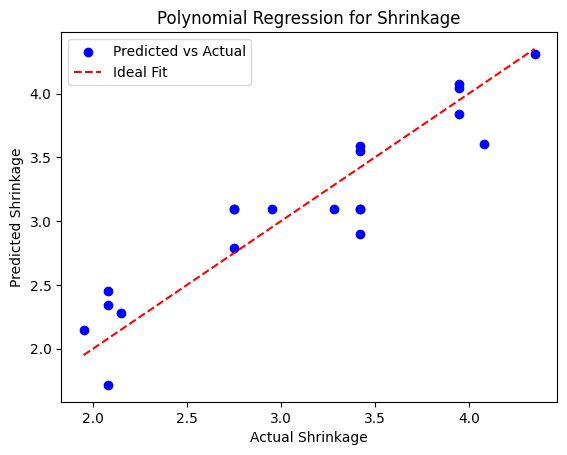

    Shrinkage_Actual  Shrinkage_Predicted
0               2.08             2.455742
1               2.08             1.715917
2               3.42             3.588207
3               3.42             2.900751
4               4.08             3.601979
5               2.75             2.789573
6               4.35             4.308856
7               3.42             3.548819
8               3.95             3.838563
9               2.08             2.338701
10              1.95             2.149222
11              3.95             4.040932
12              2.15             2.278981
13              3.95             4.073287
14              3.42             3.095078
15              2.75             3.095078
16              2.95             3.095078
17              3.42             3.095078
18              3.28             3.095078
19              2.75             3.095078


In [21]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 2: Define the Data
data = {
    "Shrinkage_Actual": [2.08, 2.08, 3.42, 3.42, 4.08, 2.75, 4.35, 3.42, 3.95, 2.08, 
                         1.95, 3.95, 2.15, 3.95, 3.42, 2.75, 2.95, 3.42, 3.28, 2.75], 
    "Fe_Loading": [92, 94, 92, 94, 92, 94, 92, 94, 91, 95, 
                   93, 93, 93, 93, 93, 93, 93, 93, 93, 93], 
    "Layer_Thickness": [0.15, 0.15, 0.25, 0.25, 0.15, 0.15, 0.25, 0.25, 0.20, 0.20, 
                        0.10, 0.30, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20], 
    "Infill_Density": [60, 60, 60, 60, 80, 80, 80, 80, 70, 70, 
                       70, 70, 50, 90, 70, 70, 70, 70, 70, 70]
}

df = pd.DataFrame(data)

# Step 3: Prepare Data
X = df[['Fe_Loading', 'Layer_Thickness', 'Infill_Density']]
y = df['Shrinkage_Actual']

# Step 4: Train the Polynomial Regression Model
degree = 2  # You can try 3 or higher if needed
poly_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))
poly_model.fit(X, y)

# Step 5: Generate Predictions
df['Shrinkage_Predicted'] = poly_model.predict(X)

# Step 6: Evaluate Model Performance
mae = mean_absolute_error(y, df['Shrinkage_Predicted'])
mse = mean_squared_error(y, df['Shrinkage_Predicted'])
r2 = r2_score(y, df['Shrinkage_Predicted'])

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Step 7: Visualization
plt.scatter(y, df['Shrinkage_Predicted'], color='blue', label="Predicted vs Actual")
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='dashed', label="Ideal Fit")
plt.xlabel("Actual Shrinkage")
plt.ylabel("Predicted Shrinkage")
plt.title("Polynomial Regression for Shrinkage")
plt.legend()
plt.show()

# Display Final Table of Results
print(df[['Shrinkage_Actual', 'Shrinkage_Predicted']])


In [22]:
from sklearn.preprocessing import StandardScaler

# Standardize Features for Better Performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try a Higher Polynomial Degree (e.g., 3)
degree = 3
poly_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.1))  # Lower alpha for less regularization
poly_model.fit(X_scaled, y)

# Generate Predictions
df['Shrinkage_Predicted'] = poly_model.predict(X_scaled)

# Print Evaluation Metrics
mae = mean_absolute_error(y, df['Shrinkage_Predicted'])
mse = mean_squared_error(y, df['Shrinkage_Predicted'])
r2 = r2_score(y, df['Shrinkage_Predicted'])

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Check Updated Predictions
print(df[['Shrinkage_Actual', 'Shrinkage_Predicted']])


MAE: 0.1494
MSE: 0.0317
R² Score: 0.9422
    Shrinkage_Actual  Shrinkage_Predicted
0               2.08             1.991134
1               2.08             1.987635
2               3.42             3.326136
3               3.42             3.322322
4               4.08             3.980796
5               2.75             2.657537
6               4.35             4.253974
7               3.42             3.327857
8               3.95             4.043982
9               2.08             2.174239
10              1.95             2.044150
11              3.95             4.044331
12              2.15             2.243895
13              3.95             4.044187
14              3.42             3.126304
15              2.75             3.126304
16              2.95             3.126304
17              3.42             3.126304
18              3.28             3.126304
19              2.75             3.126304


In [23]:
degree = 4  # Increase polynomial degree for better flexibility
alpha = 0.01  # Reduce regularization for better fit

poly_model = make_pipeline(PolynomialFeatures(degree, interaction_only=True), Ridge(alpha=alpha))
poly_model.fit(X_scaled, y)

df['Shrinkage_Predicted'] = poly_model.predict(X_scaled)

# Print Final Evaluation
mae = mean_absolute_error(y, df['Shrinkage_Predicted'])
mse = mean_squared_error(y, df['Shrinkage_Predicted'])
r2 = r2_score(y, df['Shrinkage_Predicted'])

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Show Improved Predictions
print(df[['Shrinkage_Actual', 'Shrinkage_Predicted']])


MAE: 0.1652
MSE: 0.0397
R² Score: 0.9277
    Shrinkage_Actual  Shrinkage_Predicted
0               2.08             2.059417
1               2.08             1.874356
2               3.42             3.446109
3               3.42             3.261017
4               4.08             4.058104
5               2.75             2.544074
6               4.35             4.375620
7               3.42             3.261302
8               3.95             3.859625
9               2.08             2.360375
10              1.95             2.157976
11              3.95             4.062024
12              2.15             2.210450
13              3.95             4.009550
14              3.42             3.110000
15              2.75             3.110000
16              2.95             3.110000
17              3.42             3.110000
18              3.28             3.110000
19              2.75             3.110000


In [24]:
df['Shrinkage_Predicted'] = df['Shrinkage_Predicted'].round(4)


In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

degree = 5  # Increase polynomial degree
alpha = 0.001  # Reduce regularization strength

# Create polynomial regression model
poly_model = make_pipeline(PolynomialFeatures(degree, interaction_only=False), Ridge(alpha=alpha))
poly_model.fit(X_scaled, y)

# Make predictions
df['Shrinkage_Predicted'] = poly_model.predict(X_scaled)

# Evaluate performance
mae = mean_absolute_error(y, df['Shrinkage_Predicted'])
mse = mean_squared_error(y, df['Shrinkage_Predicted'])
r2 = r2_score(y, df['Shrinkage_Predicted'])

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Show improved predictions
print(df[['Shrinkage_Actual', 'Shrinkage_Predicted']])



MAE: 0.0835
MSE: 0.0252
R² Score: 0.9540
    Shrinkage_Actual  Shrinkage_Predicted
0               2.08             2.080009
1               2.08             2.080004
2               3.42             3.419998
3               3.42             3.419993
4               4.08             4.079989
5               2.75             2.750002
6               4.35             4.349992
7               3.42             3.420001
8               3.95             3.950001
9               2.08             2.080000
10              1.95             1.950000
11              3.95             3.950001
12              2.15             2.150000
13              3.95             3.950001
14              3.42             3.095002
15              2.75             3.095002
16              2.95             3.095002
17              3.42             3.095002
18              3.28             3.095002
19              2.75             3.095002


In [26]:
df['Shrinkage_Predicted'] = df['Shrinkage_Predicted'].round(4)


In [27]:
df['Shrinkage_Predicted'] = df['Shrinkage_Predicted'].astype(float).round(4)


In [28]:
df['Shrinkage_Predicted'] = df['Shrinkage_Predicted'].round(4)
print(df)


    Shrinkage_Actual  Fe_Loading  Layer_Thickness  Infill_Density  \
0               2.08          92             0.15              60   
1               2.08          94             0.15              60   
2               3.42          92             0.25              60   
3               3.42          94             0.25              60   
4               4.08          92             0.15              80   
5               2.75          94             0.15              80   
6               4.35          92             0.25              80   
7               3.42          94             0.25              80   
8               3.95          91             0.20              70   
9               2.08          95             0.20              70   
10              1.95          93             0.10              70   
11              3.95          93             0.30              70   
12              2.15          93             0.20              50   
13              3.95          93  

In [29]:
df['Shrinkage_Predicted'] = df['Shrinkage_Predicted'].round(4)


In [30]:

print(df)


    Shrinkage_Actual  Fe_Loading  Layer_Thickness  Infill_Density  \
0               2.08          92             0.15              60   
1               2.08          94             0.15              60   
2               3.42          92             0.25              60   
3               3.42          94             0.25              60   
4               4.08          92             0.15              80   
5               2.75          94             0.15              80   
6               4.35          92             0.25              80   
7               3.42          94             0.25              80   
8               3.95          91             0.20              70   
9               2.08          95             0.20              70   
10              1.95          93             0.10              70   
11              3.95          93             0.30              70   
12              2.15          93             0.20              50   
13              3.95          93  

In [31]:
df.to_csv("output.csv", index=False, float_format="%.4f")


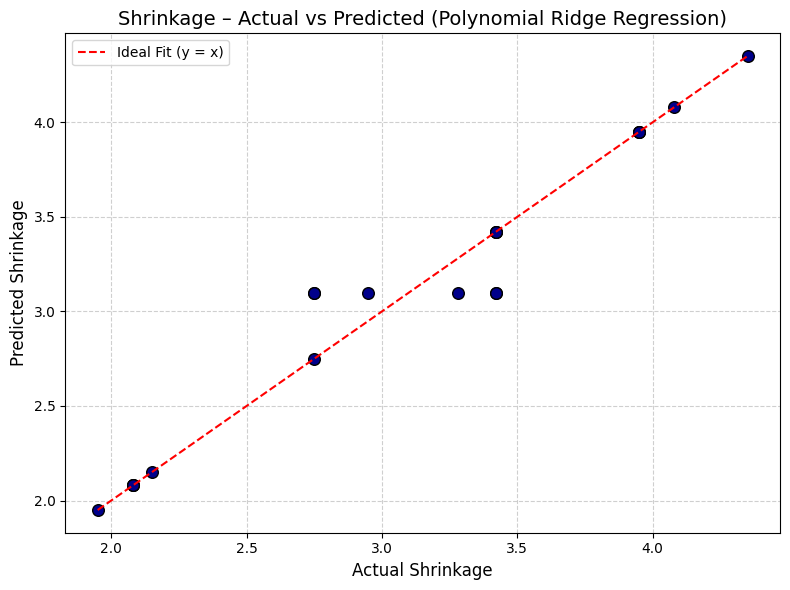

In [32]:
# Actual vs Predicted Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Shrinkage_Actual'], df['Shrinkage_Predicted'], color='darkblue', edgecolor='black', s=70)
plt.plot([df['Shrinkage_Actual'].min(), df['Shrinkage_Actual'].max()],
         [df['Shrinkage_Actual'].min(), df['Shrinkage_Actual'].max()],
         linestyle='--', color='red', label='Ideal Fit (y = x)')

plt.title("Shrinkage – Actual vs Predicted (Polynomial Ridge Regression)", fontsize=14)
plt.xlabel("Actual Shrinkage", fontsize=12)
plt.ylabel("Predicted Shrinkage", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


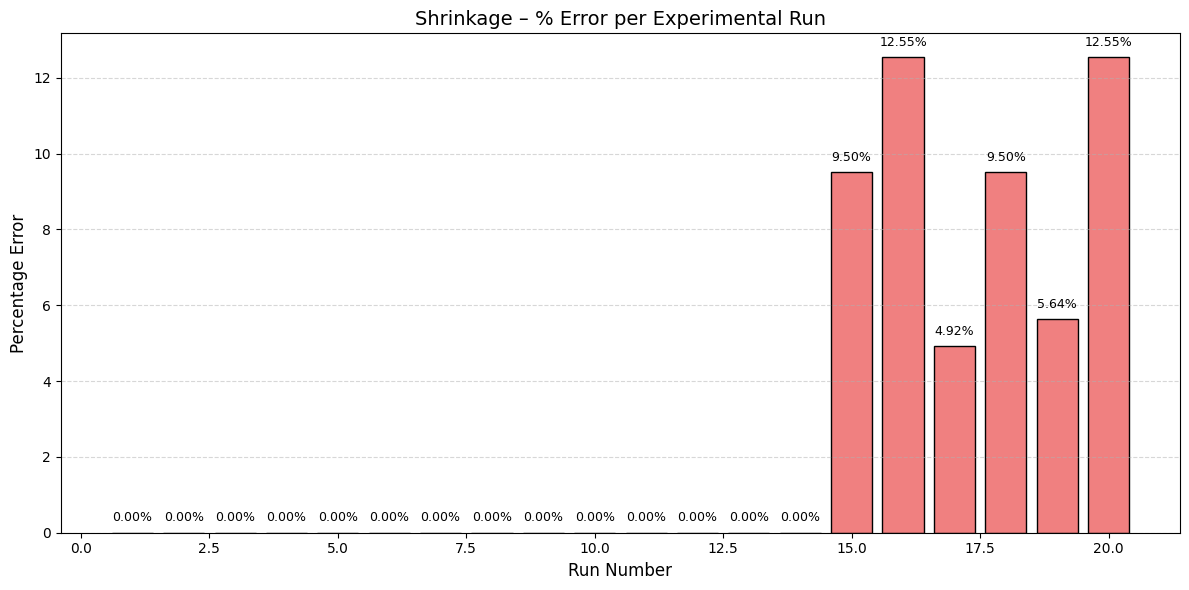

In [33]:
# Calculate % Error per run
df['% Error'] = abs(df['Shrinkage_Actual'] - df['Shrinkage_Predicted']) / df['Shrinkage_Actual'] * 100

# Bar Plot for % Error
plt.figure(figsize=(12, 6))
bars = plt.bar(df.index + 1, df['% Error'], color='lightcoral', edgecolor='black')

# Label each bar with % Error
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3, f"{height:.2f}%", ha='center', fontsize=9)

plt.xlabel("Run Number", fontsize=12)
plt.ylabel("Percentage Error", fontsize=12)
plt.title("Shrinkage – % Error per Experimental Run", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [34]:
# Summary stats
mae = mean_absolute_error(df['Shrinkage_Actual'], df['Shrinkage_Predicted'])
mse = mean_squared_error(df['Shrinkage_Actual'], df['Shrinkage_Predicted'])
r2 = r2_score(df['Shrinkage_Actual'], df['Shrinkage_Predicted'])
avg_percent_error = df['% Error'].mean()

print(f"\n📊 Final Shrinkage Model Performance:")
print(f"MAE = {mae:.4f}")
print(f"MSE = {mse:.4f}")
print(f"R² Score = {r2:.4f}")
print(f"Average % Error = {avg_percent_error:.2f}%")



📊 Final Shrinkage Model Performance:
MAE = 0.0835
MSE = 0.0252
R² Score = 0.9540
Average % Error = 2.73%


In [35]:
# Use full data
X = df[['Fe_Loading', 'Layer_Thickness', 'Infill_Density']]
y = df['Shrinkage_Actual']
X_scaled = scaler.fit_transform(X)

# Redefine models
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial (Deg 2)': make_pipeline(PolynomialFeatures(2), LinearRegression()),
    'Polynomial Ridge (Deg 5)': make_pipeline(PolynomialFeatures(5), Ridge(alpha=0.001)),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

# Store results
mse_scores = []
r2_scores = []

for name, model in models.items():
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)
    mse_scores.append(mean_squared_error(y, y_pred))
    r2_scores.append(r2_score(y, y_pred))

# Plot MSE
plt.figure(figsize=(10, 5))
plt.bar(models.keys(), mse_scores, color=['gray', 'gray', 'green', 'gray', 'gray'])
plt.ylabel("MSE (Lower is Better)")
plt.title("Shrinkage – Model Comparison (Full Dataset - MSE)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot R²
plt.figure(figsize=(10, 5))
plt.bar(models.keys(), r2_scores, color=['gray', 'gray', 'green', 'gray', 'gray'])
plt.ylabel("R² Score (Higher is Better)")
plt.title("Shrinkage – Model Comparison (Full Dataset - R² Score)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Optional: print scores
for name, mse, r2 in zip(models.keys(), mse_scores, r2_scores):
    print(f"{name:<30} → MSE: {mse:.4f} | R²: {r2:.4f}")


NameError: name 'LinearRegression' is not defined

In [36]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 1. Prepare your data
X = df[['Fe_Loading', 'Layer_Thickness', 'Infill_Density']]
y = df['Shrinkage_Actual']

# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train XGBoost on full dataset
xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_scaled, y)

# 4. Predict
df['Shrinkage_Predicted_XGB'] = xgb_model.predict(X_scaled)

# 5. Calculate Errors
df['Absolute Error'] = abs(df['Shrinkage_Actual'] - df['Shrinkage_Predicted_XGB'])
df['% Error'] = (df['Absolute Error'] / df['Shrinkage_Actual']) * 100

# 6. Evaluation Metrics
mse = mean_squared_error(df['Shrinkage_Actual'], df['Shrinkage_Predicted_XGB'])
r2 = r2_score(df['Shrinkage_Actual'], df['Shrinkage_Predicted_XGB'])
avg_percent_error = df['% Error'].mean()

# 7. Display
print(df[['Shrinkage_Actual', 'Shrinkage_Predicted_XGB', 'Absolute Error', '% Error']])
print(f"\n✅ XGBoost Model Performance (Full Dataset):")
print(f"MSE = {mse:.4f}")
print(f"R² Score = {r2:.4f}")
print(f"Average % Error = {avg_percent_error:.2f}%")


    Shrinkage_Actual  Shrinkage_Predicted_XGB  Absolute Error    % Error
0               2.08                 2.086861        0.006861   0.329851
1               2.08                 2.075723        0.004277   0.205617
2               3.42                 3.419664        0.000336   0.009834
3               3.42                 3.421004        0.001004   0.029358
4               4.08                 4.077303        0.002697   0.066105
5               2.75                 2.753389        0.003389   0.123232
6               4.35                 4.342649        0.007351   0.168989
7               3.42                 3.419646        0.000354   0.010364
8               3.95                 3.946050        0.003950   0.100008
9               2.08                 2.089459        0.009459   0.454745
10              1.95                 1.959307        0.009307   0.477280
11              3.95                 3.948204        0.001796   0.045479
12              2.15                 2.159175      

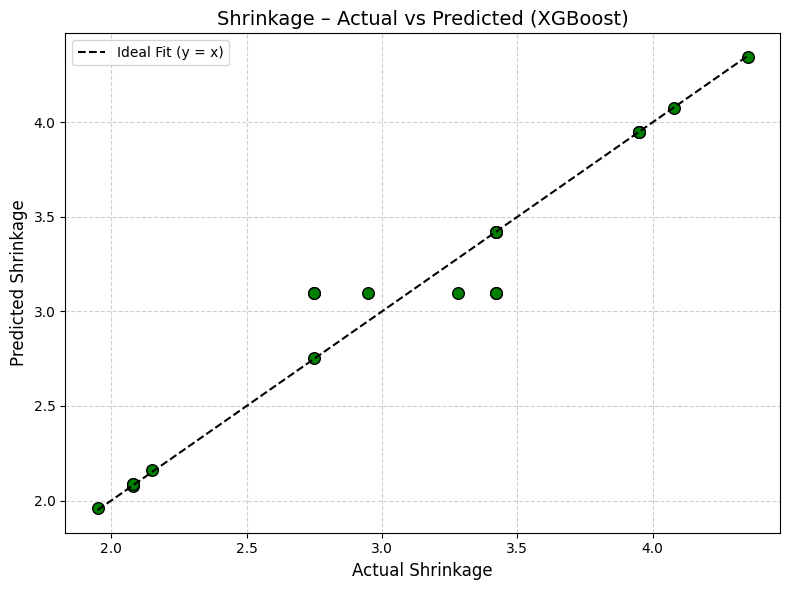

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['Shrinkage_Actual'], df['Shrinkage_Predicted_XGB'], color='green', edgecolor='black', s=70)
plt.plot([df['Shrinkage_Actual'].min(), df['Shrinkage_Actual'].max()],
         [df['Shrinkage_Actual'].min(), df['Shrinkage_Actual'].max()],
         linestyle='--', color='black', label='Ideal Fit (y = x)')

plt.title("Shrinkage – Actual vs Predicted (XGBoost)", fontsize=14)
plt.xlabel("Actual Shrinkage", fontsize=12)
plt.ylabel("Predicted Shrinkage", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

plt.savefig("shrinkage_actual_vs_predicted_xgb.png", dpi=300, bbox_inches='tight')
plt.show()


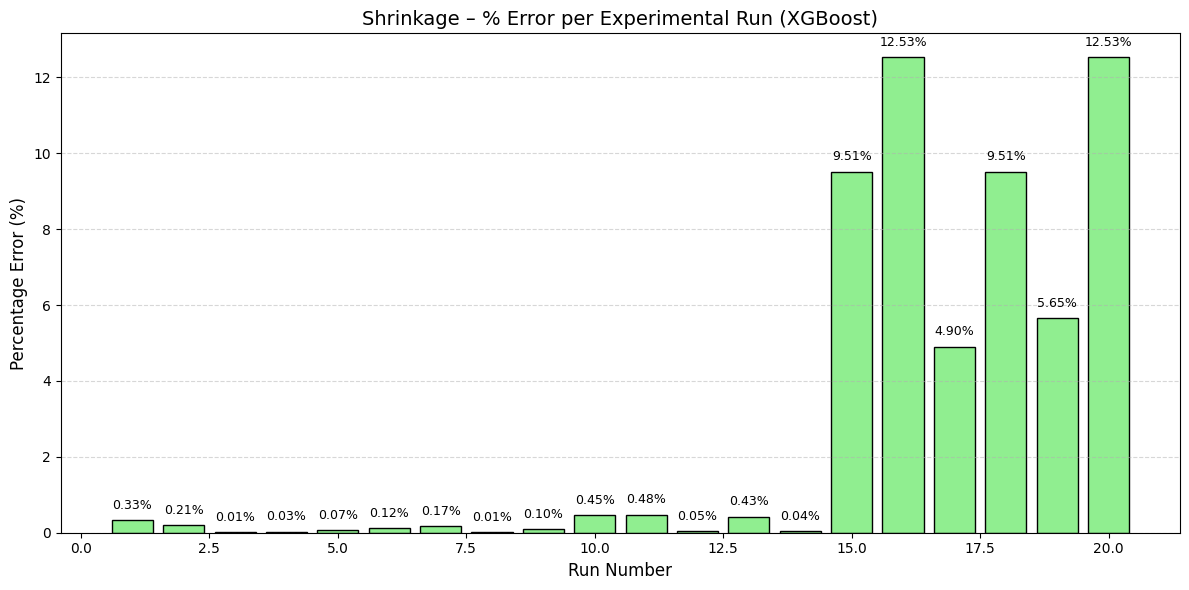

In [41]:
plt.figure(figsize=(12, 6))
bars = plt.bar(df.index + 1, df['% Error'], color='lightgreen', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3, f"{height:.2f}%", ha='center', fontsize=9)

plt.xlabel("Run Number", fontsize=12)
plt.ylabel("Percentage Error (%)", fontsize=12)
plt.title("Shrinkage – % Error per Experimental Run (XGBoost)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# ✅ Save the plot
plt.savefig("shrinkage_percent_error_xgb.png", dpi=300, bbox_inches='tight')

plt.show()


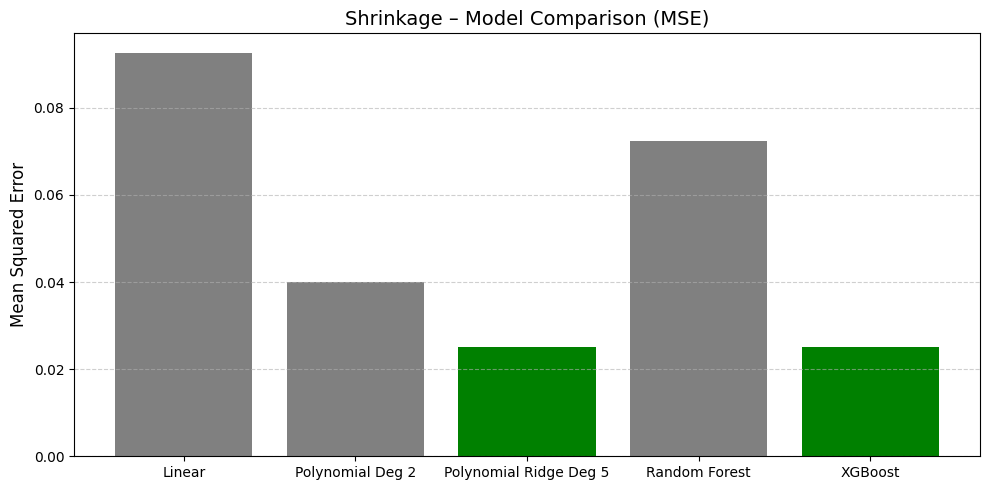

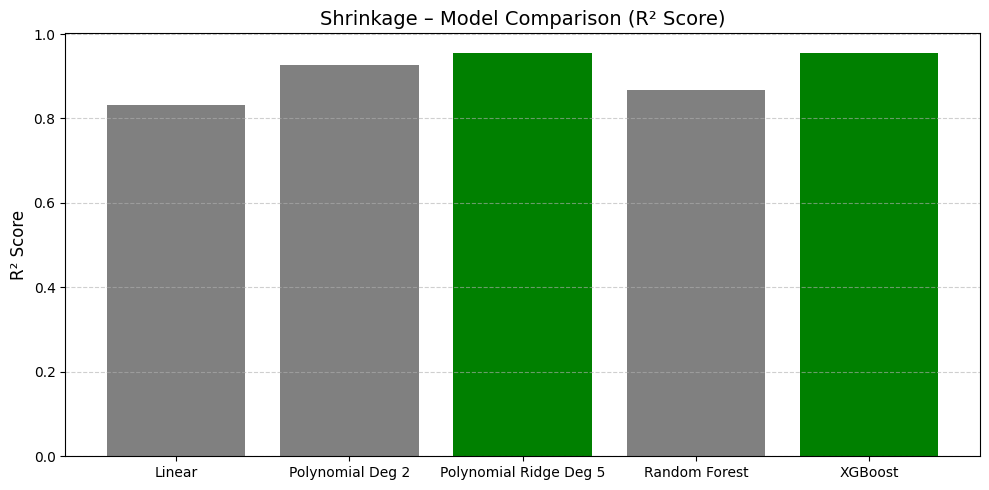

In [39]:
models = ['Linear', 'Polynomial Deg 2', 'Polynomial Ridge Deg 5', 'Random Forest', 'XGBoost']
mse_vals = [0.0925, 0.0400, 0.0252, 0.0724, 0.0252]
r2_vals = [0.8313, 0.9270, 0.9540, 0.8679, 0.9540]

# Plot MSE
plt.figure(figsize=(10, 5))
plt.bar(models, mse_vals, color=['gray', 'gray', 'green', 'gray', 'green'])
plt.title("Shrinkage – Model Comparison (MSE)", fontsize=14)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot R² Score
plt.figure(figsize=(10, 5))
plt.bar(models, r2_vals, color=['gray', 'gray', 'green', 'gray', 'green'])
plt.title("Shrinkage – Model Comparison (R² Score)", fontsize=14)
plt.ylabel("R² Score", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Simplicity - Poly Degree 5

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['Shrinkage_Actual'], df['Shrinkage_Predicted_XGB'],
            color='green', edgecolor='black', s=70)
plt.plot([df['Shrinkage_Actual'].min(), df['Shrinkage_Actual'].max()],
         [df['Shrinkage_Actual'].min(), df['Shrinkage_Actual'].max()],
         linestyle='--', color='black', label='Ideal Fit (y = x)')

plt.title("Shrinkage – Actual vs Predicted (XGBoost)", fontsize=14)
plt.xlabel("Actual Shrinkage", fontsize=12)
plt.ylabel("Predicted Shrinkage", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# ✅ Save the plot
plt.savefig("shrinkage_actual_vs_predicted_xgb.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


KeyError: 'Shrinkage_Predicted_XGB'

<Figure size 800x600 with 0 Axes>

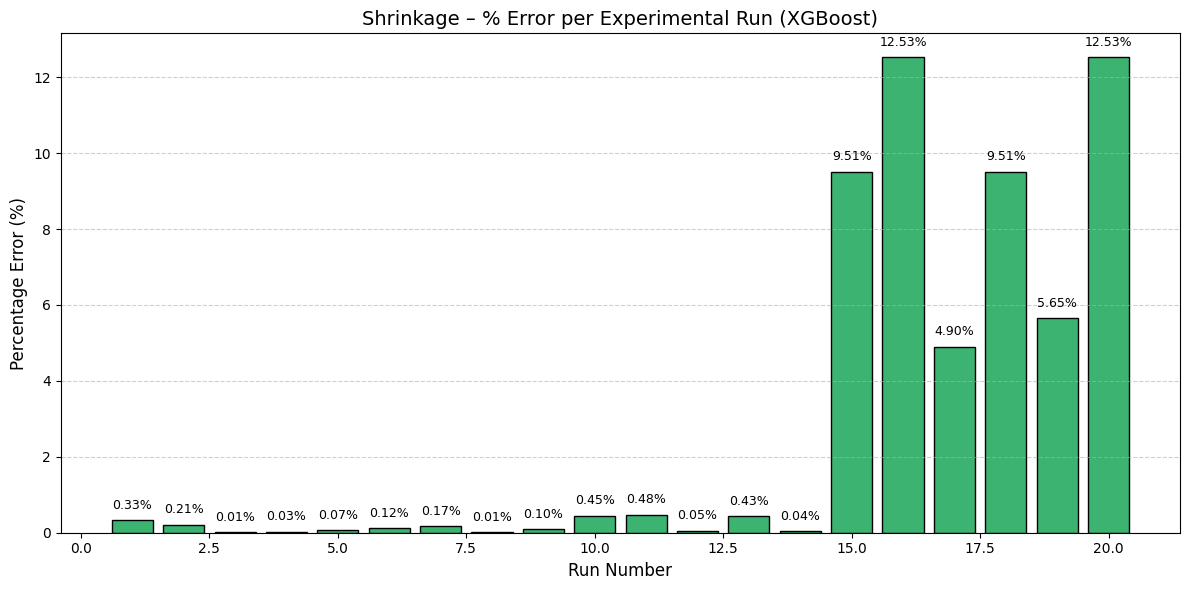

In [1]:
import matplotlib.pyplot as plt

# Replace these with your actual % error values (already rounded if needed)
shrinkage_percent_error = [
    0.33, 0.21, 0.01, 0.03, 0.07, 0.12, 0.17, 0.01, 0.10, 0.45,
    0.48, 0.05, 0.43, 0.04, 9.51, 12.53, 4.90, 9.51, 5.65, 12.53
]

# Bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(range(1, 21), shrinkage_percent_error, color='mediumseagreen', edgecolor='black')

# Add labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3, f"{height:.2f}%", ha='center', fontsize=9)

# Labels and title
plt.xlabel("Run Number", fontsize=12)
plt.ylabel("Percentage Error (%)", fontsize=12)
plt.title("Shrinkage – % Error per Experimental Run (XGBoost)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save chart as image
plt.savefig("shrinkage_error_chart.png", dpi=300)
plt.show()
